Part b2. use the pure pytorch tensor data structure to build the same but with auto differentiation primitives

# Import Libraries

In [ ]:
pip install tsne

     |████████████████████████████████| 552kB 8.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp37-cp37m-linux_x86_64.whl size=260481 sha256=f91658b340a019a596d2c8c2ea81ca3befbd584b91fb9a50685162d5c6e769fa
  Stored in directory: /root/.cache/pip/wheels/3e/d6/fc/58392f18ea8fc4c74e20185d2faeee87a1c1924a182606c6cd
Successfully built tsne


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import torch
import torch.nn as nn

# Defining Classes

In [ ]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 50)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(50, 2)

  def forward(self, input):
    l1 = self.linear1(input)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

# Defined model fit method

In [ ]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

# Plot Method

In [ ]:
#Plot using TSNE
from tsne import bh_sne
def tsne_plot(x_tensor, y_true_tensor):
  vis_data = bh_sne(x_tensor)
  # plot the result
  vis_x = vis_data[:, 0]
  vis_y = vis_data[:, 1]
  plt.scatter(vis_x, vis_y, c=y_true_tensor, cmap=plt.cm.get_cmap("jet", 10))
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  plt.show()

# Call Model

In [11]:
d = 3
n = 200
inputs = np.random.uniform(-1, 1, (n,d))
weights_true = np.array([[2 , -1, 1], [1, -1, 1]]).T
bias_true = np.array([10])
y_true = (inputs**3) @ weights_true + (inputs**2) @ weights_true + inputs @ weights_true + bias_true
loss = nn.MSELoss()
model = TorchModel(d, 20)
#auto Differentiation using require_grad
x_tensor = torch.tensor(inputs).float().requires_grad_(True)
y_true_tensor = torch.tensor(y_true).float().requires_grad_(True)

tensor(112.2846, grad_fn=<MseLossBackward>)
tensor(64.1357, grad_fn=<MseLossBackward>)
tensor(98.2357, grad_fn=<MseLossBackward>)
tensor(94.3667, grad_fn=<MseLossBackward>)
tensor(75.2426, grad_fn=<MseLossBackward>)
tensor(54.8184, grad_fn=<MseLossBackward>)
tensor(25.4400, grad_fn=<MseLossBackward>)
tensor(4.6329, grad_fn=<MseLossBackward>)
tensor(4.4350, grad_fn=<MseLossBackward>)
tensor(4.3084, grad_fn=<MseLossBackward>)
tensor(4.1576, grad_fn=<MseLossBackward>)
tensor(3.9148, grad_fn=<MseLossBackward>)
tensor(3.5077, grad_fn=<MseLossBackward>)
tensor(2.8746, grad_fn=<MseLossBackward>)
tensor(2.1389, grad_fn=<MseLossBackward>)
tensor(1.5328, grad_fn=<MseLossBackward>)
tensor(1.2580, grad_fn=<MseLossBackward>)
tensor(1.2597, grad_fn=<MseLossBackward>)
tensor(2.1336, grad_fn=<MseLossBackward>)
tensor(8.6351, grad_fn=<MseLossBackward>)
tensor(24.6644, grad_fn=<MseLossBackward>)
tensor(7.1450, grad_fn=<MseLossBackward>)
tensor(8.6187, grad_fn=<MseLossBackward>)
tensor(4.2040, grad_fn=<M

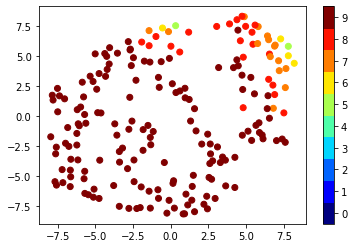

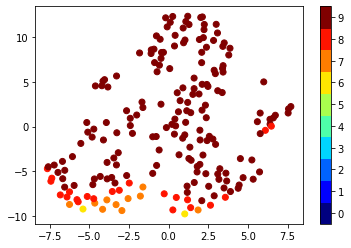

In [ ]:
torch_fit(x_tensor, y_true_tensor, model, loss, lr=0.1, num_epochs=88)
tsne_plot(inputs, y_true[:,0])
tsne_plot(inputs, y_true[:,1])